## Demo Nested Topic Modeling Maps using bunkatech

 Nested Topic Modeling is a way to explore data using embeddings and nestedness. The class uses the BasicSemantics class at his core and add a new layer on top of it. go to **demo_basics.ipynb** to understand the core functions of bunkatech.

In [10]:
import pandas as pd
from bunkatech.topic_modeling import NestedTopicModeling
import warnings
warnings.filterwarnings('ignore')
 
    
data = pd.read_csv('../data/imdb.csv', index_col = [0])
data = data.sample(2000, random_state = 42)

#### Extract the basic elements

In [2]:
nested = NestedTopicModeling(data = data,
                        text_var = 'description',
                        index_var = 'imdb',
                        extract_terms=True,
                        terms_embedding=True,
                        docs_embedding=True,
                        sample_size_terms=2000,
                        terms_limit=2000,
                        terms_ents=False,
                        terms_ngrams=(2, 2),
                        terms_ncs=False,
                        terms_include_pos=["NOUN", "PROPN", "ADJ"],
                        terms_include_types=["PERSON", "ORG"],
                        terms_embedding_model="all-MiniLM-L6-v2",
                        docs_embedding_model="all-MiniLM-L6-v2",
                        language="en",
                        terms_path=None,
                        docs_dimension_reduction = 5,
                        terms_embeddings_path=None,
                        docs_embeddings_path=None,
                        docs_multiprocessing = True,
                        terms_multiprocessing = True)

  0%|                                                                           | 0/1991 [00:00<?, ?it/s]2022-03-31 09:16:40,025 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,034 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,034 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,037 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,039 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,046 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,047 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-31 09:16:40,050 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|███████████████████████████████████████████████████████████████| 1991/1991 [00:09<00:00, 203.49it/s]
2022-03-31 09:16:42,783 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-31 09:16:50,244 - INFO : Use pytorch device: c

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2022-03-31 09:16:58,356 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Start Embedding...


2022-03-31 09:17:05,811 - INFO : Use pytorch device: cpu
2022-03-31 09:17:05,812 - INFO : CUDA is not available. Start 4 CPU worker
2022-03-31 09:17:05,812 - INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-03-31 09:17:11,074 - INFO : Chunk data into packages of size 50


UMAP(n_components=5, verbose=True)
Thu Mar 31 09:17:26 2022 Construct fuzzy simplicial set
Thu Mar 31 09:17:27 2022 Finding Nearest Neighbors
Thu Mar 31 09:17:29 2022 Finished Nearest Neighbor Search
Thu Mar 31 09:17:30 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 31 09:17:32 2022 Finished embedding


#### Create the Nested maps

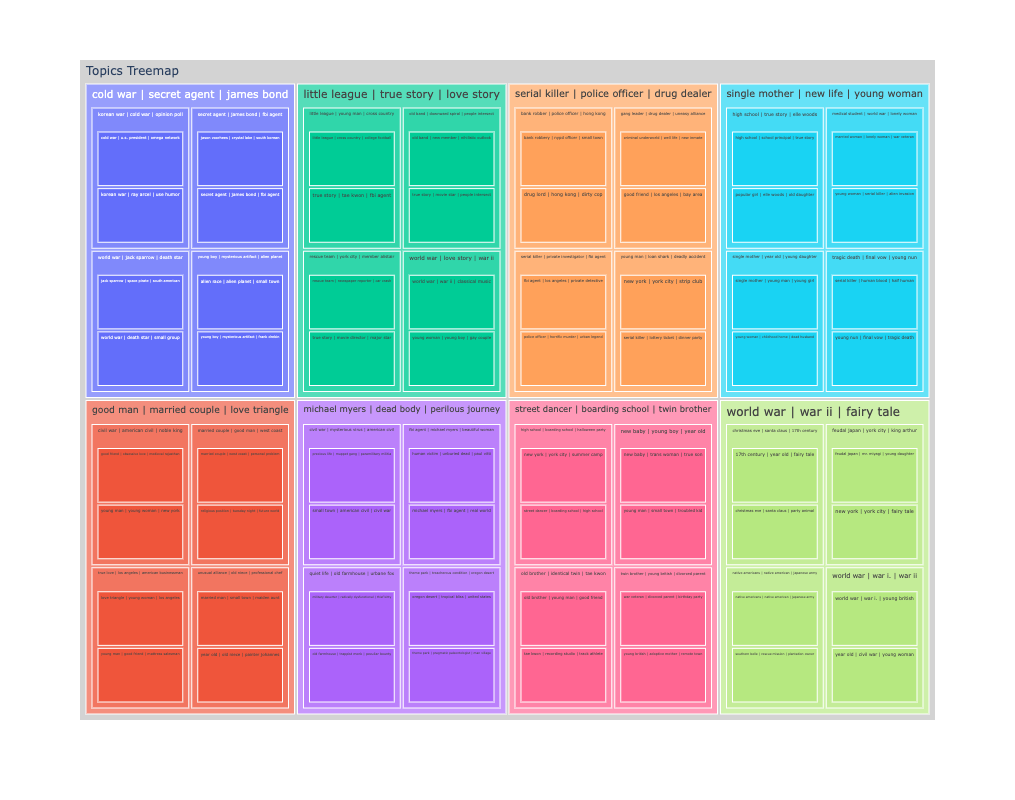

In [6]:
fig = nested.nested_maps(
        size_rule="equal_size",
        map_type="treemap", # Try sunburst
        width=800,
        height=800,
        query=None) # You can query the map with an exact query

fig.show()

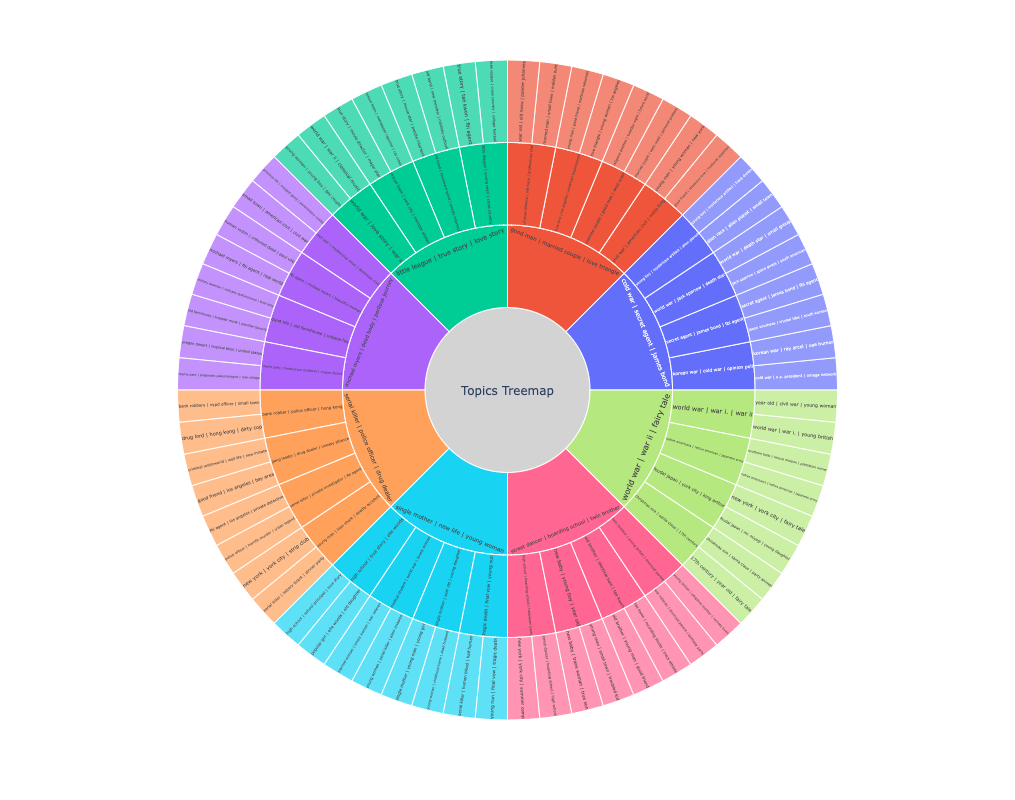

In [7]:
fig = nested.nested_maps(
        size_rule="equal_size",
        map_type="sunburst", # Try sunburst
        width=800,
        height=800,
        query=None) # You can query the map with an exact query

fig.show()

#### For every level, visual the emebddings on a 2D Maps

UMAP( verbose=True)
Thu Mar 31 09:19:40 2022 Construct fuzzy simplicial set
Thu Mar 31 09:19:41 2022 Finding Nearest Neighbors
Thu Mar 31 09:19:41 2022 Finished Nearest Neighbor Search
Thu Mar 31 09:19:41 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Mar 31 09:19:43 2022 Finished embedding


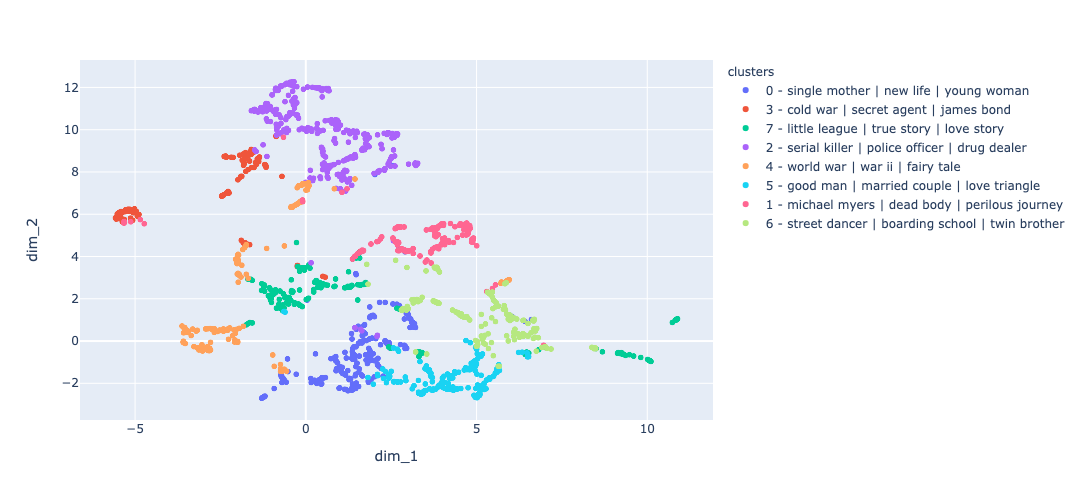

In [8]:
nested.visualize_2D_embeddings(nested_level=0,  width = 800, height = 500)

#### Visualize the centroid documents of every cluster for every level of nestedness

In [9]:
centroid_documents = nested.get_centroid_documents_nested(nested_level = 0, top_elements = 2)
centroid_documents

,clusters,centroid_docs,farest_doc,cluster_radius
0,0,A senator returns to a western town for the fu...,"Dracula is resurrected, preying on four unsusp...",2.468085
1,1,After being exiled from the most advanced town...,"Five medical students experiment with ""near de...",2.062083
2,2,When the attempt to kill a professor goes wron...,"To win back his ex-girlfriend, a conservative ...",2.118450
3,3,Foul-mouthed mutant mercenary Wade Wilson (a.k...,Harvard symbologist Robert Langdon works with ...,2.109812
4,4,A young swordsman comes to Paris and faces vil...,His annual Christmas party faltering thanks to...,2.302289
5,5,A young man in love with a girl from a rich fa...,The story of Aung San Suu Kyi as she becomes t...,1.782679
6,6,Donnie Darko's little sister Samantha and her ...,"A troubled kid inadvertently releases a genie,...",1.931606
7,7,"Based on H.G. Bissinger's book, which profiled...","An aging, down-on-his-luck ex-minor leaguer co...",2.505064
